# Analysis of fMRI Stability Scans

The fMRI Stability scans at CRIC are based on the fBIRN protocols, which are an adaptation of the published methods of [Friedman and Glover 2006](http://www.ncbi.nlm.nih.gov/pubmed/16649196).
The routine analysis uses the BIRN code and the scans are of a spherical phantom based on that used by BIRN.
The BIRN software and protocols are available at:

- [BIRN](http://www.birncommunity.org/tools-catalog/function-birn-stability-phantom-qa-procedures/)
- [New BHX Xcede Tools](http://www.nitrc.org/projects/bxh_xcede_tools)
- [BHX Tools Docs](https://xwiki.nbirn.org:8443/bin/view/Function-BIRN/AutomatedQA)

This notebook uses locally implemented equivalents of the BIRN analysis routines and presents more detailed results for the current scans. The results may be compared with those obtained by the standard BIRN analysis.

## Obtaining QA Scans

We get the FMRI QA scans from the DICOM server (for now - need to change this to use test data). This is the long term stability series `ep2d_fbirn_20min` a long EPI time series (600 frames at 2s per frame). Each frame is a Siemens mosaic image (VE11C) which we'll unpack to a volume.

In [1]:
from os.path import abspath
import sys

# The analysis library
sys.path.insert(0, abspath('..'))
from mriqa.reports import fbirn_short_report, fbirn_full_report
from dcmfetch import fetch_series

In [2]:
dobjs = sorted(fetch_series('PQA20191001CRIC', '1', 47), key=lambda d: float(d.AcquisitionTime))

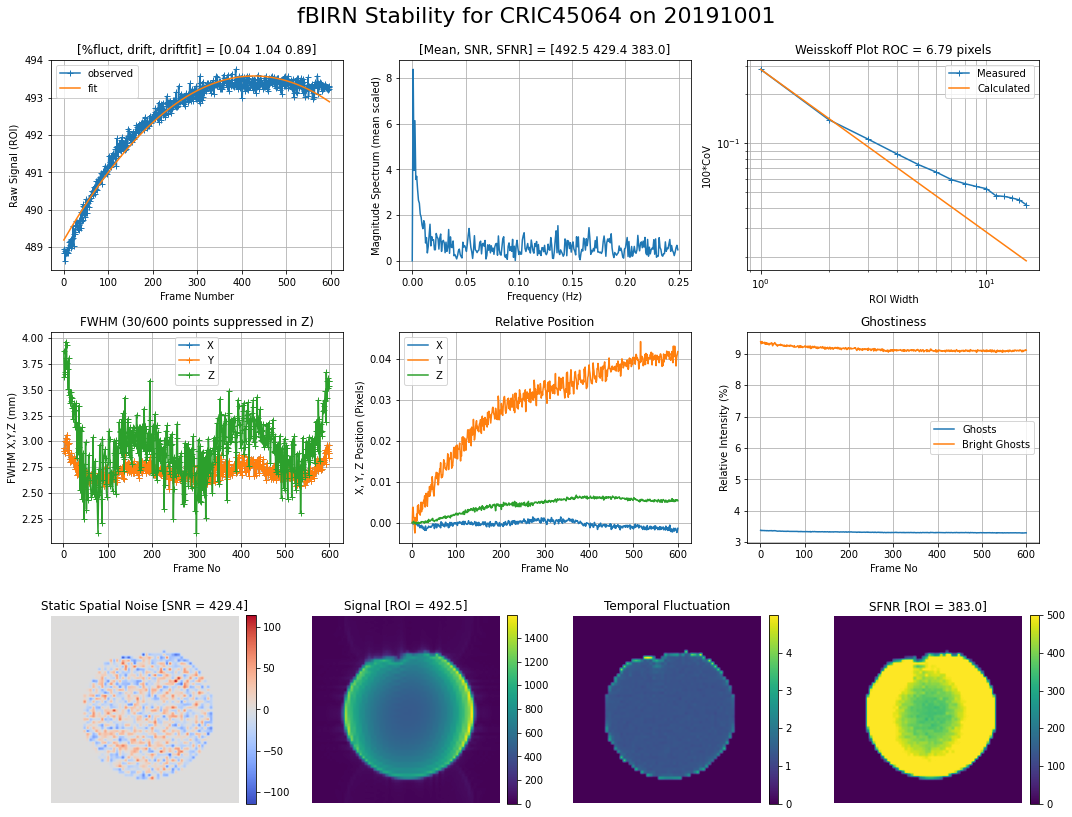

         40444430 function calls (39438566 primitive calls) in 288.739 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    37204   38.235    0.001   38.235    0.001 {skimage.segmentation._watershed_cy.watershed_raveled}
   871030   18.226    0.000   18.226    0.000 {method 'reduce' of 'numpy.ufunc' objects}
2459282/1497026   16.066    0.000  110.655    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    37204   10.507    0.000   10.507    0.000 {built-in method scipy.ndimage._nd_image.rank_filter}
    37872    9.754    0.000    9.766    0.000 {built-in method builtins.sorted}
    37204    8.002    0.000    8.002    0.000 {built-in method scipy.ndimage._nd_image.binary_erosion2}
    74405    7.410    0.000    7.410    0.000 {built-in method scipy.ndimage._nd_image.binary_erosion}
    37204    7.085    0.000   21.768    0.001 histograms.py:678(histogram)
    74408    6.942    0.000    6.942    0.

In [3]:
%prun fbirn_full_report(dobjs)

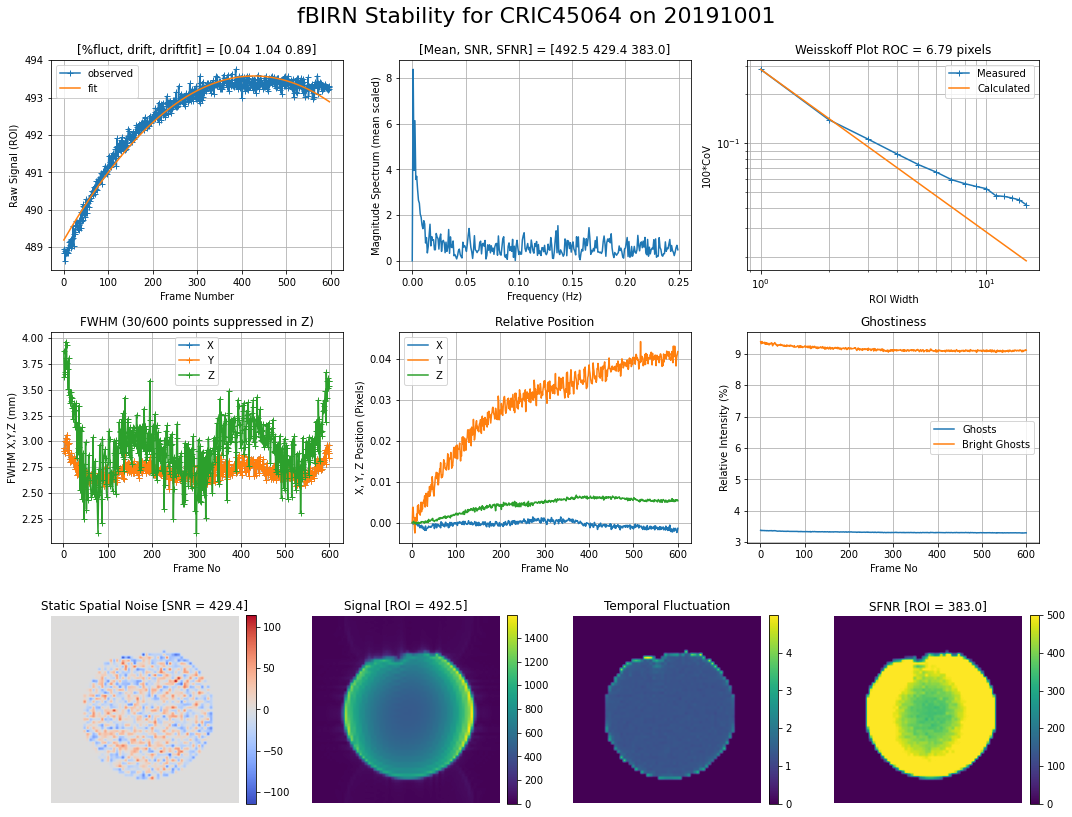

In [4]:
results = fbirn_full_report(dobjs)

In [5]:
results

Fluctuations  FittedDrift    Ghosts  BrightGhosts  \
CRIC45064_20191001      0.041899     0.889696  3.321577      9.151237   

                    SignalMean         SNR        SFNR  
CRIC45064_20191001  492.464905  429.400284  383.032669

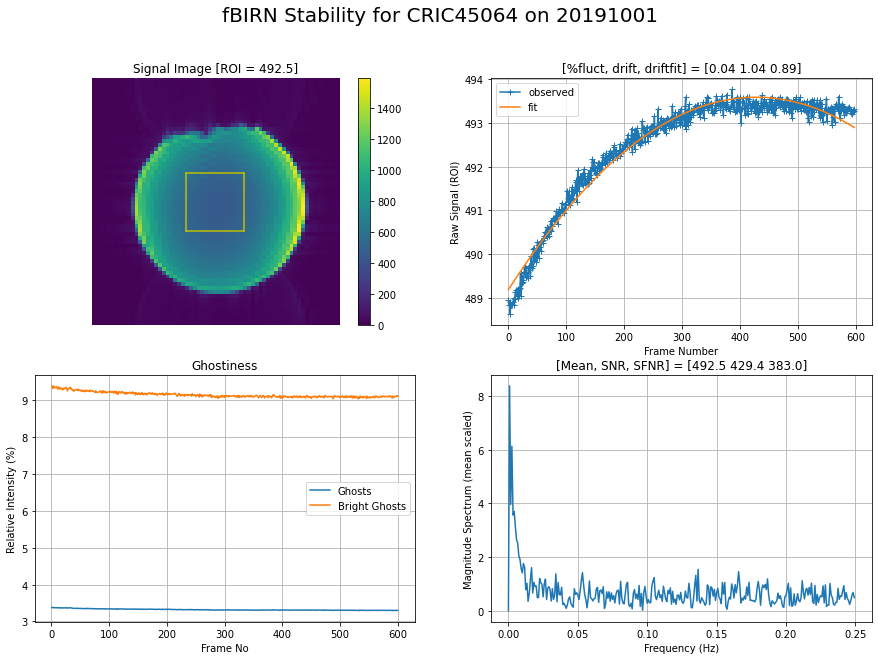

In [6]:
results = fbirn_short_report(dobjs)

In [7]:
results

Fluctuations  FittedDrift    Ghosts  BrightGhosts  \
CRIC45064_20191001      0.041899     0.889696  3.321577      9.151237   

                    SignalMean         SNR        SFNR  
CRIC45064_20191001  492.464905  429.400284  383.032669